### 2.3: Fundamentals of Visualization Libraries Part 1

In [2]:
# Import libraries

import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from datetime import datetime as dt

In [11]:
import matplotlib as mpl
matplotlib.__version__

NameError: name 'matplotlib' is not defined

In [13]:
df = pd.read_csv('/Users/katiedallarosa/Desktop/CitiBike/nymerged_data.csv', index_col = 0)

/var/folders/zp/dgvf82dj1f11lqylj8ps_3c00000gn/T/ipykernel_16849/1183187172.py:1: DtypeWarning: Columns (7,9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/Users/katiedallarosa/Desktop/CitiBike/nymerged_data.csv', index_col = 0)


In [14]:
df.columns

Index(['Unnamed: 0', 'ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'date', 'avgTemp', '_merge'],
      dtype='object')

In [15]:
# Remove merge column

df.drop(columns = {'_merge'}, inplace = True)

In [16]:
# Check data

df.head()

,Unnamed: 0,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,date,avgTemp
0,0,344EB2CD04CD1B71,classic_bike,2022-04-13 18:46:17.884,2022-04-13 18:54:21.655,Lafayette St & Jersey St,5561.06,W 15 St & 6 Ave,5989.02,40.724561,-73.995653,40.738046,-73.996430,member,2022-04-13,19.1
1,1,17248543C251F4FB,electric_bike,2022-06-24 16:08:25.267,2022-06-24 16:23:26.771,W 29 St & 9 Ave,6416.06,Spring St & Hudson St,5653.12,40.750073,-73.998393,40.725840,-74.007653,casual,2022-06-24,25.6
2,2,43658D9AB9938656,classic_bike,2022-05-28 18:39:18.883,2022-05-28 19:09:58.450,N 11 St & Kent Ave,5489.04,Kent Ave & N 7 St,5489.03,40.722482,-73.959219,40.720368,-73.961651,casual,2022-05-28,16.1
3,3,0158721C43867EFE,classic_bike,2022-04-29 19:33:55.052,2022-04-29 19:40:16.920,DeKalb Ave & Hudson Ave,4513.06,Flushing Ave & Vanderbilt Ave,4762.05,40.689888,-73.981013,40.697950,-73.970776,casual,2022-04-29,11.9
4,4,B08E1E3FFC1F965B,classic_bike,2022-09-30 09:43:40.072,2022-09-30 09:58:17.811,Christopher St & Greenwich St,5847.01,7 Ave S & Bleecker St,5805.07,40.732916,-74.007114,40.732139,-74.003638,member,2022-09-30,13.2


In [17]:
# Check shape

df.shape

(7459541, 16)

In [18]:
# Check data types

df.dtypes

Unnamed: 0              int64
ride_id                object
rideable_type          object
started_at             object
ended_at               object
start_station_name     object
start_station_id       object
end_station_name       object
end_station_id         object
start_lat             float64
start_lng             float64
end_lat               float64
end_lng               float64
member_casual          object
date                   object
avgTemp               float64
dtype: object

In [19]:
# Convert date column to datetime object

df['date'] = pd.to_datetime(df['date'])

In [20]:
# Recheck dtypes

df.dtypes

Unnamed: 0                     int64
ride_id                       object
rideable_type                 object
started_at                    object
ended_at                      object
start_station_name            object
start_station_id              object
end_station_name              object
end_station_id                object
start_lat                    float64
start_lng                    float64
end_lat                      float64
end_lng                      float64
member_casual                 object
date                  datetime64[ns]
avgTemp                      float64
dtype: object

### Create a line plot of the temperatures for 2022 plotted as time series using the weather dataframe.

In [22]:
# Increase agg.path.chunksize to avoid the OverflowError

mpl.rcParams['agg.path.chunksize'] = 10000

In [23]:
df_temp = df.set_index('date')

In [24]:
df_temp = df_temp.sort_index()

In [25]:
df_temp.head()

,Unnamed: 0,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,avgTemp
date,,,,,,,,,,,,,,,
2022-01-01,1632524,830188C15B6C8EC0,electric_bike,2022-01-01 02:55:46.459,2022-01-01 03:21:24.714,Allen St & Rivington St,5414.06,11 Ave & W 59 St,7059.01,40.720196,-73.989978,40.771497,-73.990460,member,2.0
2022-01-01,1400941,ECF79600E04B4943,classic_bike,2022-01-01 21:02:22.267,2022-01-01 21:07:06.492,E 157 St & River Ave,8005.03,Jerome Ave & Ogden Ave,8081.01,40.825737,-73.927311,40.829797,-73.931015,member,2.0
2022-01-01,1212986,7952F985DF8AF100,classic_bike,2022-01-01 10:36:54.935,2022-01-01 10:49:25.744,Central Park North & Adam Clayton Powell Blvd,7617.07,Lenox Ave & W 130 St,7753.13,40.799484,-73.955613,40.810792,-73.943068,member,2.0
2022-01-01,4982747,8FA5C8D8A9132C21,classic_bike,2022-01-01 04:03:12.205,2022-01-01 04:09:45.492,Linden St & Knickerbocker Ave,4743.04,Central Ave & Woodbine St,4632.10,40.697140,-73.915660,40.692960,-73.916050,member,2.0
2022-01-01,5992435,D45508850E699D0A,classic_bike,2022-01-01 10:54:57.592,2022-01-01 10:59:05.390,Mercer St & Spring St,5532.01,Grand St & Elizabeth St,5382.06,40.723627,-73.999496,40.718822,-73.995960,member,2.0


<Axes: xlabel='date'>

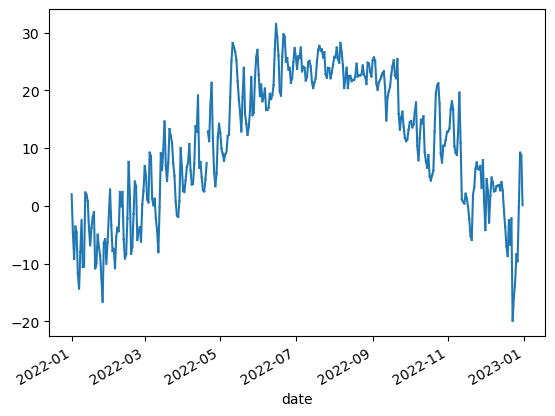

In [26]:
# Create simple plot

df_temp['avgTemp'].plot()

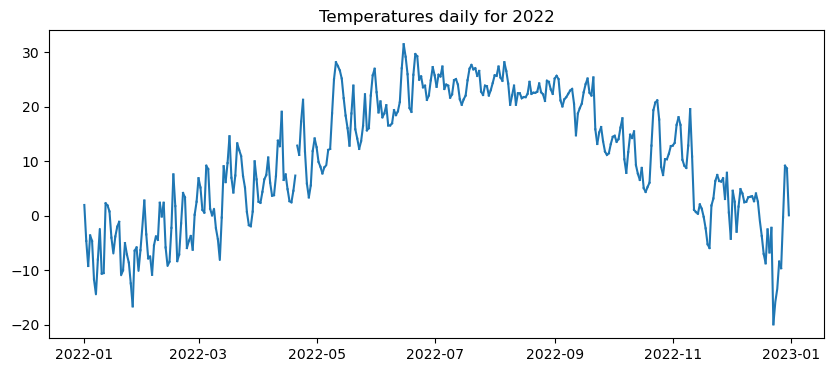

In [48]:
# Create plot for avg temps for 2022 w/ title and adjusting figure size

plt.figure(figsize=(10,4))
plt.title('Temperatures daily for 2022')
plt.plot(df_temp['avgTemp'])
plt.savefig('dailytemps.png', bbox_inches='tight')
plt.show()

### Create a column with the count of trips per day and merge it with the weather dataframe.

In [51]:
df.columns

Index(['Unnamed: 0', 'ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'date', 'avgTemp'],
      dtype='object')

In [57]:
# Groupby the count of the trips 

df_group = pd.DataFrame(df.groupby(['date'])['ride_id'].count()).reset_index()

In [60]:
# Check data

df_group.head()

,date,ride_id
0,2022-01-01,5125
1,2022-01-02,10638
2,2022-01-03,8310
3,2022-01-04,9271
4,2022-01-05,8614


In [71]:
df_group.rename(columns = {'ride_id':'bike_rides_daily'}, inplace = True)

In [81]:
if '_merge' in df.columns:
    df.drop(columns=['_merge'], inplace=True)
if '_merge' in df_group.columns:
    df_group.drop(columns=['_merge'], inplace=True)

In [83]:
df = df.merge(df_group, on = "date", how = 'outer', indicator = True)
print(df['_merge'].value_counts(dropna = False))
print("Shape of January 1st is", df[df['date'] == '2022-01-01'].shape) # Check 
print("Shape of January 2nd is", df[df['date'] == '2022-01-02'].shape) # Second check 

df_temp = df.set_index('date')

print(df_temp.columns)

_merge
both          7459541
left_only           0
right_only          0
Name: count, dtype: int64
Shape of January 1st is (5125, 20)
Shape of January 2nd is (10638, 20)
Index(['Unnamed: 0', 'ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'avgTemp', 'bike_rides_daily_x', 'bike_rides_daily_y',
       'bike_rides_daily', '_merge'],
      dtype='object')


In [86]:
# Check data

df_temp.head()

,Unnamed: 0,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,avgTemp,bike_rides_daily_x,bike_rides_daily_y,bike_rides_daily,_merge
date,,,,,,,,,,,,,,,,,,,
2022-01-01,1832,69198402DE2F09D9,electric_bike,2022-01-01 18:47:29.261,2022-01-01 19:34:01.835,Mott St & Prince St,5561.04,E 138 St & Cypress Ave,7669.10,40.723180,-73.994800,40.805559,-73.914718,member,2.0,5125,5125,5125,both
2022-01-01,2264,A88286580E006A23,classic_bike,2022-01-01 12:11:43.270,2022-01-01 12:22:41.986,Dock 72 Way & Market St,4804.02,Washington Ave & Greene Ave,4419.03,40.699850,-73.971410,40.686501,-73.965633,member,2.0,5125,5125,5125,both
2022-01-01,2505,5C8D80FADFCE6A5A,classic_bike,2022-01-01 12:39:49.213,2022-01-01 12:45:54.864,Great Jones St,5636.11,W 13 St & 7 Ave,6030.04,40.727434,-73.993790,40.737815,-73.999947,casual,2.0,5125,5125,5125,both
2022-01-01,3470,EE8147050ACEB21C,classic_bike,2022-01-01 10:44:01.137,2022-01-01 10:46:53.936,E 13 St & 2 Ave,5820.08,Cooper Square & Astor Pl,5712.03,40.731539,-73.985302,40.729515,-73.990753,member,2.0,5125,5125,5125,both
2022-01-01,3738,21B74269FD2FCDBD,classic_bike,2022-01-01 01:11:09.098,2022-01-01 01:36:58.774,W 17 St & 8 Ave,6148.02,Duane St & Hudson St,5359.12,40.741776,-74.001497,40.717030,-74.009250,casual,2.0,5125,5125,5125,both


In [89]:
# Drop dupe bike_rides_daily columns

df = df.drop(columns=['bike_rides_daily_x', 'bike_rides_daily_y'])

### Create a line chart of bike trip counts and temperatures plotted on a dual axis.

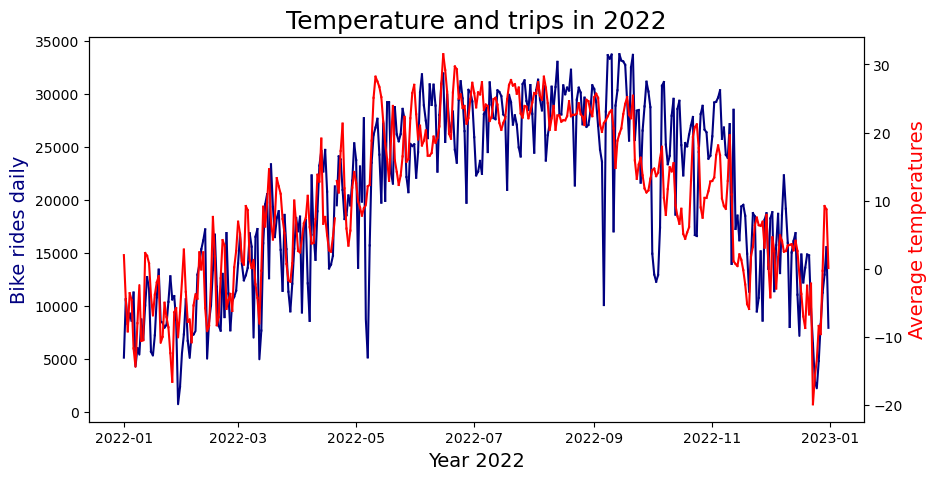

In [93]:
# Create figure and axis objects with subplots() and details

fig,ax = plt.subplots(figsize=(10, 5))

# Make a plot of the bike rides
ax.plot(df_temp['bike_rides_daily'],color = "navy")
ax.set_xlabel("Year 2022", fontsize = 14) # set x-axis label
ax.set_ylabel("Bike rides daily",color = "navy", fontsize = 14) # set y-axis label

# Here is where we create the dual axis - initialize a twin object for two different y-axis on the sample plot
ax2 = ax.twinx()

# Make a plot with the temperatues on the y-axis using second axis object
ax2.plot(df_temp["avgTemp"], color = "red")
ax2.set_ylabel("Average temperatures", color = "red",fontsize=14)
plt.title('Temperature and trips in 2022', fontsize = 18)
plt.show()

### In a markdown cell, briefly explain your code; how did you use Matplotlib to achieve this? Which paradigm did you use?

Using the Object-Oriented Approach, I utilized matplotlib to put the axes in the same plot for both the bike rides daily and average temperatures. The first step starts with defining the objects using fig,ax and figure size to ensure the data shows correctly on the graph. Then, used the dual axix, twin axis to use the two variables.